### Imports

In [3]:
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
from pathlib import Path
from pycurrents.adcp.rdiraw import Multiread
import yaml

import velosearaptor

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

## Moored ADCP Data Processing with .yaml Parameter File

Read meta data and processing parameters from yaml file. [parameters.yml](parameters.yml).

In [4]:
parameter_file = Path('parameters.yml')

In [5]:
p = velosearaptor.io.parse_yaml_input(parameter_file, "MAVS2", 24606)

In [6]:
a = velosearaptor.madcp.ProcessADCPyml(parameter_file, mooring="MAVS2", sn=24606, verbose=False)

No depth gridding parameters provided, using default values.


time between pings within burst: 3.0 s
time between bursts: 14.0 min
22 pings per burst
365 bursts total


In [7]:
a.burst_average_ensembles()

  0%|                                                                                                  | 0/365 [00:00<?, ?it/s]/Users/gunnar/Projects/python/velosearaptor/velosearaptor/madcp.py:1379: RuntimeWarning: invalid value encountered in cast
  pg[i] = pgi_grid.astype(np.int8)
100%|███████████████████████████████████████████████████████████████████████████████████████| 365/365 [00:02<00:00, 145.85it/s]


[(1440.0, 1130.0)]

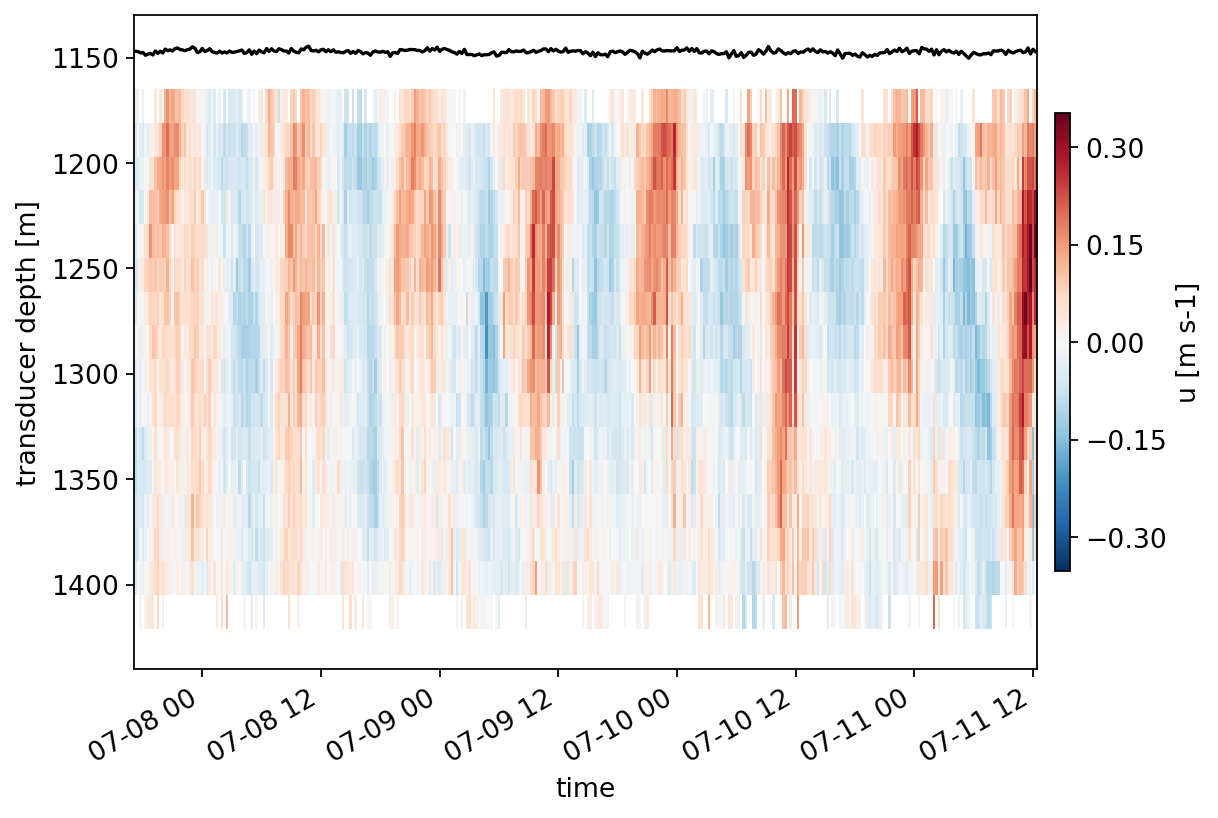

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5),
                       constrained_layout=True)
# a.ds.u.plot(ax=ax)
# a.ds.pressure.plot(ax=ax)
a.ds.u.plot(
    ax=ax,
    cbar_kwargs=dict(aspect=30, shrink=0.7, ticks=mpl.ticker.MaxNLocator(5), pad=0.02),
)
a.ds.xducer_depth.plot(ax=ax, color="k")
ax.invert_yaxis()
ax.set(ylim=(1440, 1130))

In [9]:
a.ds

<xarray.Dataset>
Dimensions:       (depth: 19, time: 365)
Coordinates:
  * time          (time) datetime64[ns] 2021-07-07T17:16:03.000325 ... 2021-0...
  * depth         (depth) float64 1.173e+03 1.189e+03 ... 1.445e+03 1.461e+03
Data variables: (12/13)
    pg            (depth, time) float64 90.0 95.0 nan 100.0 ... nan 0.0 nan nan
    u             (depth, time) float32 -0.02441 -0.02481 nan ... nan nan nan
    v             (depth, time) float32 -0.01944 -0.05288 nan ... nan nan nan
    w             (depth, time) float32 -0.01062 0.0005326 nan ... nan nan nan
    e             (depth, time) float32 0.02553 0.006142 nan ... nan nan nan
    u_error       (depth, time) float32 0.02772 0.007684 nan ... nan nan nan
    ...            ...
    w_error       (depth, time) float32 0.003658 0.002203 nan ... nan nan nan
    amp           (depth, time) float32 157.0 158.0 nan 156.4 ... 179.2 nan nan
    temperature   (time) float32 6.564 6.678 6.668 6.688 ... 5.653 5.614 5.56
    pressure      (time) float32 1.161e+03 1.161e+03 ... 1.16e+03 1.161e+03
    npings        (time) int16 12 22 22 22 22 22 22 22 ... 22 22 22 22 22 22 2
    xducer_depth  (time) float64 1.147e+03 1.147e+03 ... 1.146e+03 1.147e+03
Attributes: (12/15)
    orientation:      down
    magdec:           -4.822373
    max_e:            0.2
    max_e_deviation:  2
    min_correlation:  64
    project:          BLT
    ...               ...
    sn:               24606
    nominal_depth:    1157m
    Bin1Dist:         25.55
    NCells:           19
    CellSize:         16.0
    proc time:        2023-10-13T21:04:43

In [10]:
a.ds.attrs

{'orientation': 'down',
 'magdec': -4.822373,
 'max_e': 0.2,
 'max_e_deviation': 2,
 'min_correlation': 64,
 'project': 'BLT',
 'mooring': 'MAVS2',
 'lon': -11.843,
 'lat': 54.182,
 'sn': 24606,
 'nominal_depth': '1157m',
 'Bin1Dist': 25.55,
 'NCells': 19,
 'CellSize': 16.0,
 'proc time': '2023-10-13T21:04:43'}